https://www.kaggle.com/datasets/kukuroo3/body-performance-data/code

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


In [2]:
import os
import pandas as pd
FILE_PATH = r"C:\Users\DELL\Downloads\archive (3)\bodyPerformance.csv"

data = pd.read_csv(FILE_PATH, encoding="latin-1")

In [3]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
data.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [5]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [6]:
data.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'weight_kg'}>],
       [<Axes: title={'center': 'body fat_%'}>,
        <Axes: title={'center': 'diastolic'}>,
        <Axes: title={'center': 'systolic'}>],
       [<Axes: title={'center': 'gripForce'}>,
        <Axes: title={'center': 'sit and bend forward_cm'}>,
        <Axes: title={'center': 'sit-ups counts'}>],
       [<Axes: title={'center': 'broad jump_cm'}>, <Axes: >, <Axes: >]],
      dtype=object)

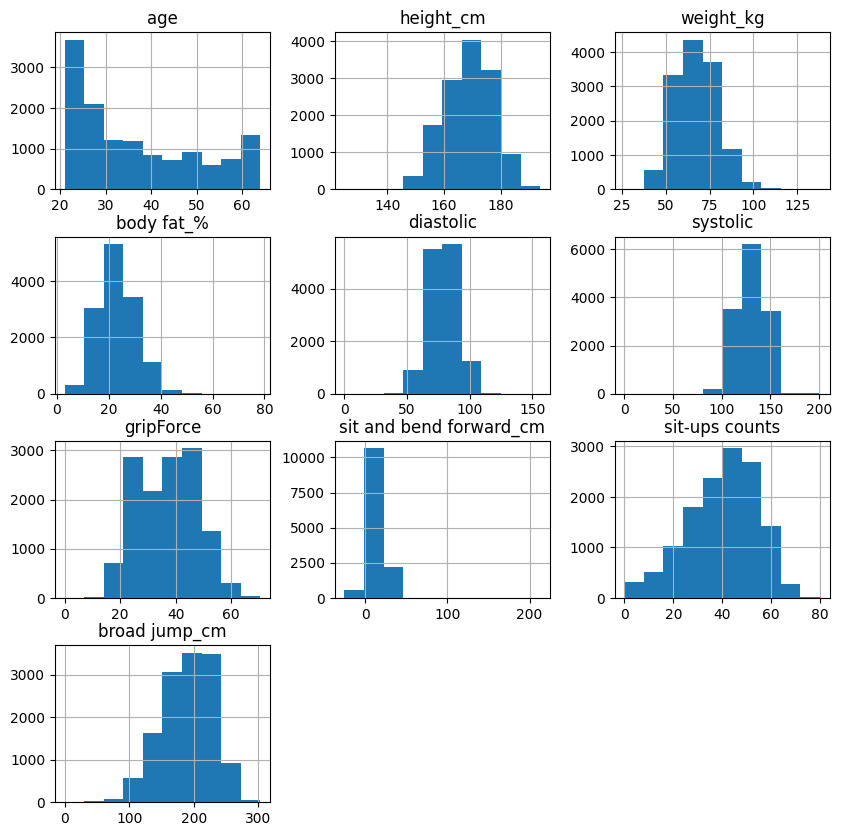

In [7]:
data.hist(figsize=(10,10))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'height_cm'),
  Text(2, 0, 'weight_kg'),
  Text(3, 0, 'body fat_%'),
  Text(4, 0, 'diastolic'),
  Text(5, 0, 'systolic'),
  Text(6, 0, 'gripForce'),
  Text(7, 0, 'sit and bend forward_cm'),
  Text(8, 0, 'sit-ups counts'),
  Text(9, 0, 'broad jump_cm')])

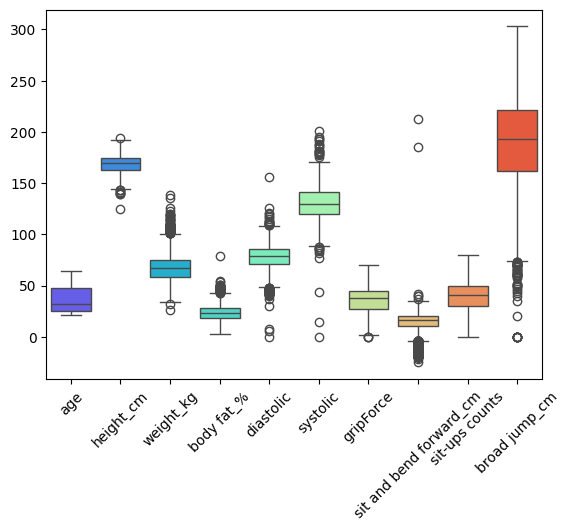

In [8]:
sns.boxplot(data=data,palette='rainbow')
plt.xticks(rotation=45)

In [9]:
categ_columns= ['gender','class']
num_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_columns)
print(categ_columns)

['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
['gender', 'class']


In [10]:
# Identify numerical columns (excluding target)
from scipy.stats import skew

if 'class' in num_columns:  # Ensure target is not included
    num_columns.remove('class')

# Compute skewness
skewness = data[num_columns].apply(lambda x: skew(x.dropna()))
skewed_features = skewness[abs(skewness) > 0.75].index  # Threshold for skewness

print(f"Skewed Features: {list(skewed_features)}")

# Apply log transformation to skewed features
data[skewed_features] = data[skewed_features].apply(lambda x: np.log1p(x))


Skewed Features: ['sit and bend forward_cm']


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
X = data.drop(columns=["class"], axis=1)
y= data["class"]

In [12]:
y

0        C
1        A
2        C
3        B
4        B
        ..
13388    C
13389    D
13390    A
13391    D
13392    C
Name: class, Length: 13393, dtype: object

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(10714, 11)
(2679, 11)
(10714,)
(2679,)


In [14]:
# Select only numeric columns
X_train_numeric = X_train.select_dtypes(include=['number'])

# Compute IQR for numeric columns only
Q1 = X_train_numeric.quantile(0.25)
Q3 = X_train_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter rows to remove outliers
mask = ~((X_train_numeric < (Q1 - 1.5 * IQR)) | (X_train_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
X_train = X_train[mask]  # Apply mask to original dataframe
y_train = y_train[mask]  # Ensure labels are also filtered

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9933, 11)
(2679, 11)
(9933,)
(2679,)


In [15]:
# Clean column lists
num_columns = [col for col in num_columns if col in X_train.columns]
categ_columns = [col for col in categ_columns if col in X_train.columns]

In [16]:
#pipeline
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categ_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(sparse_output=False, drop="first" ,handle_unknown="ignore"))
])

#combine
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_columns),
    ("categ", categ_pipeline, categ_columns),
])

# Apply
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier
import numpy as np

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model using encoded labels
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_encoded)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_final, y_train_encoded)

# Predict
y_pred_encoded = xgb_model.predict(X_test_final)

# Decode predictions
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

mse = mean_squared_error(y_test_encoded, y_pred_encoded)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
r2 = r2_score(y_test_encoded, y_pred_encoded)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7477
Mean Squared Error (MSE): 0.4076147816349384
Mean Absolute Error (MAE): 0.30160507652109
R² Score: 0.6791734989037714

Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.86      0.80       685
           B       0.63      0.63      0.63       662
           C       0.70      0.72      0.71       650
           D       0.93      0.78      0.85       682

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



      Actual Predicted
10635      D         D
5496       A         A
13055      C         A
11826      C         C
1326       D         D


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


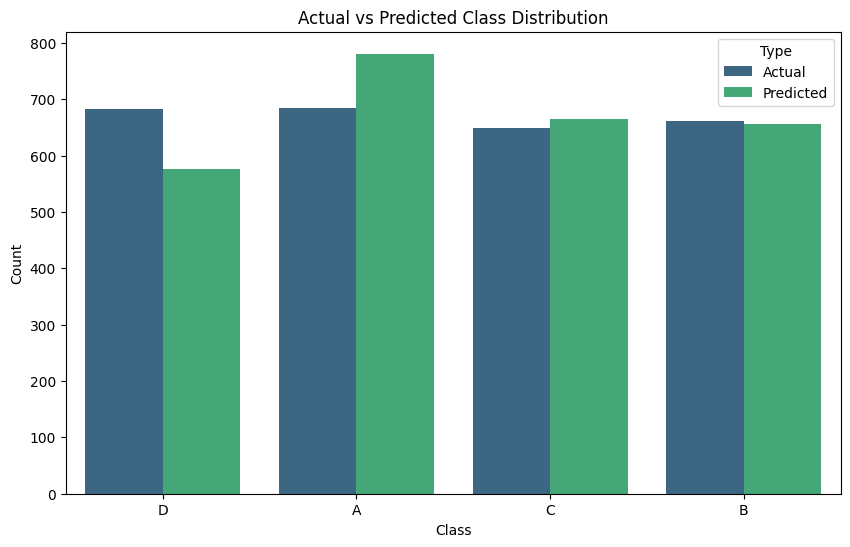

In [18]:
# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the first few rows of the comparison
print(comparison_df.head())

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df.melt(var_name='Type', value_name='Class'), x='Class', hue='Type', palette='viridis')
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()